## Crude Oil Price Prediction Using LMSP Deep Learning

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
training=pd.read_csv('Crude Oil Prices Daily_Train.csv')

In [22]:
training.head()

,Date,Closing Value
0,2/3/1986,17.42
1,2/4/1986,15.58
2,2/5/1986,16.28
3,2/6/1986,16.60
4,2/7/1986,17.70


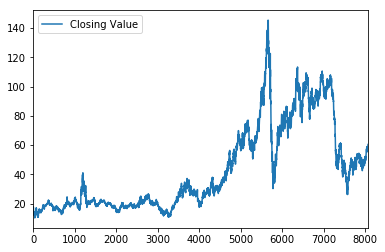

In [23]:
training.plot()

In [30]:
training.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [31]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8063 entries, 0 to 8064
Data columns (total 2 columns):
Date             8063 non-null object
Closing Value    8063 non-null float64
dtypes: float64(1), object(1)
memory usage: 189.0+ KB


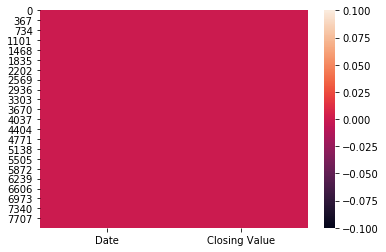

In [36]:
sns.heatmap(training.isnull())

#sns.heatmap(training.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [8]:
#deleting all the null value
#training=training.dropna()

In [39]:

train_data=training.iloc[:,1:2].values
train_data

array([[17.42],
       [15.58],
       [16.28],
       ...,
       [59.64],
       [59.84],
       [60.42]])

In [40]:
#features Extraction

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_data=scaler.fit_transform(train_data)
scaled_train_data

array([[0.05308752],
       [0.03946394],
       [0.04464682],
       ...,
       [0.36568932],
       [0.36717015],
       [0.37146453]])

In [41]:
len(scaled_train_data)

8063

In [86]:
scaled_train_data[1][0]

0.03946394195172516

In [11]:
X_train=[]
y_train=[]
for i in range(90,len(scaled_train_data)):
    X_train.append(scaled_train_data[i-90:i,0])
    y_train.append(scaled_train_data[i,0])


In [47]:
len(scaled_train_data)/90

89.58888888888889

In [55]:
X_train.shape

(7973, 90, 1)

In [57]:
y_train.shape

(7973,)

In [58]:

#Converting the data to the numpy array as it is expected by our RNN model
X_train=np.array(X_train)
y_train=np.array(y_train)    


In [60]:
X_train.shape

(7973, 90, 1)

In [61]:
y_train.shape

(7973,)

In [13]:
#Reshaping 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [64]:
X_train

array([[[0.05308752],
        [0.03946394],
        [0.04464682],
        ...,
        [0.01747372],
        [0.01577077],
        [0.02421146]],

       [[0.03946394],
        [0.04464682],
        [0.04701614],
        ...,
        [0.01577077],
        [0.02421146],
        [0.02547016]],

       [[0.04464682],
        [0.04701614],
        [0.05516067],
        ...,
        [0.02421146],
        [0.02547016],
        [0.02650674]],

       ...,

       [[0.27484081],
        [0.27683992],
        [0.28254109],
        ...,
        [0.35621205],
        [0.35702651],
        [0.36813268]],

       [[0.27683992],
        [0.28254109],
        [0.27528506],
        ...,
        [0.35702651],
        [0.36813268],
        [0.36568932]],

       [[0.28254109],
        [0.27528506],
        [0.27854287],
        ...,
        [0.36813268],
        [0.36568932],
        [0.36717015]]])

In [65]:
X_train.shape

(7973, 90, 1)

In [68]:
#builiding the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [16]:
#Intialising the model
model=Sequential()

#First layer
model.add(LSTM(units=40,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
#Second layer
model.add(LSTM(units=40,return_sequences=True))
model.add(Dropout(0.2))
#Third layer
model.add(LSTM(units=40,return_sequences=True))
model.add(Dropout(0.2))
#Fourth Layer
model.add(LSTM(units=40,return_sequences=False))
model.add(Dropout(0.2))
#Output Layer
model.add(Dense(1))

#compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')

#fitting the model on our dataset
model.fit(X_train,y_train,epochs=7,batch_size=32)

Epoch 1/7
250/250 [==============================] - 32s 129ms/step - loss: 0.0039
Epoch 2/7
250/250 [==============================] - 34s 135ms/step - loss: 0.0018
Epoch 3/7
250/250 [==============================] - 30s 121ms/step - loss: 0.0015
Epoch 4/7
250/250 [==============================] - 29s 118ms/step - loss: 0.0013
Epoch 5/7
250/250 [==============================] - 30s 120ms/step - loss: 0.0012
Epoch 6/7
250/250 [==============================] - 31s 122ms/step - loss: 0.0012
Epoch 7/7
250/250 [==============================] - 30s 122ms/step - loss: 0.0011


In [17]:
#Making the final dataset for making predictions 

testing=pd.read_csv('Crude Oil Prices Daily_Test.csv')
testing=testing.dropna()
test_data=testing.iloc[:,1:2].values

In [18]:
final_dataset=pd.concat((training['Closing Value'],testing['Closing Value']),axis=0)
input_Data=final_dataset[len(final_dataset)-len(test_data)-90:].values
input_Data=input_Data.reshape(-1,1)
input_Data=scaler.transform(input_Data)

In [69]:
input_Data

array([[0.27528506],
       [0.27854287],
       [0.26891752],
       [0.26795498],
       [0.26440101],
       [0.27380424],
       [0.27424848],
       [0.27484081],
       [0.28439212],
       [0.28809418],
       [0.28757589],
       [0.27565526],
       [0.28002369],
       [0.28120835],
       [0.28913076],
       [0.29349919],
       [0.29349919],
       [0.29364727],
       [0.2904635 ],
       [0.29734933],
       [0.2983859 ],
       [0.29920036],
       [0.31075078],
       [0.30823338],
       [0.31015845],
       [0.30586406],
       [0.30667851],
       [0.29860803],
       [0.29742337],
       [0.29416556],
       [0.30016289],
       [0.28905672],
       [0.29120391],
       [0.30112543],
       [0.30393899],
       [0.29875611],
       [0.30504961],
       [0.30815934],
       [0.30823338],
       [0.30941804],
       [0.30386495],
       [0.30519769],
       [0.30838146],
       [0.31260181],
       [0.31045461],
       [0.31386051],
       [0.32318969],
       [0.325

In [70]:
len(input_Data)

111

In [73]:
input_Data[2:92,0]

array([0.26891752, 0.26795498, 0.26440101, 0.27380424, 0.27424848,
       0.27484081, 0.28439212, 0.28809418, 0.28757589, 0.27565526,
       0.28002369, 0.28120835, 0.28913076, 0.29349919, 0.29349919,
       0.29364727, 0.2904635 , 0.29734933, 0.2983859 , 0.29920036,
       0.31075078, 0.30823338, 0.31015845, 0.30586406, 0.30667851,
       0.29860803, 0.29742337, 0.29416556, 0.30016289, 0.28905672,
       0.29120391, 0.30112543, 0.30393899, 0.29875611, 0.30504961,
       0.30815934, 0.30823338, 0.30941804, 0.30386495, 0.30519769,
       0.30838146, 0.31260181, 0.31045461, 0.31386051, 0.32318969,
       0.32504072, 0.32674367, 0.32615134, 0.32792833, 0.33607286,
       0.3487339 , 0.34762328, 0.34473567, 0.34740116, 0.34421738,
       0.34436547, 0.3365171 , 0.33377758, 0.3323708 , 0.3428106 ,
       0.33940471, 0.34488376, 0.35369465, 0.36058048, 0.35436102,
       0.35347253, 0.34836369, 0.3491041 , 0.35621205, 0.34962239,
       0.35073301, 0.33844217, 0.34384718, 0.34880794, 0.35347

In [19]:
#Getting the stock price of previous 60 days
X_test=[]
for i in range(90,111):
    X_test.append(input_Data[i-90:i,0])
X_test=np.array(X_test)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [74]:
X_test

array([[[0.27528506],
        [0.27854287],
        [0.26891752],
        ...,
        [0.36568932],
        [0.36717015],
        [0.37146453]],

       [[0.27854287],
        [0.26891752],
        [0.26795498],
        ...,
        [0.36717015],
        [0.37146453],
        [0.37109433]],

       [[0.26891752],
        [0.26795498],
        [0.26440101],
        ...,
        [0.37146453],
        [0.37109433],
        [0.38042352]],

       ...,

       [[0.2904635 ],
        [0.29734933],
        [0.2983859 ],
        ...,
        [0.4098919 ],
        [0.40915149],
        [0.41381608]],

       [[0.29734933],
        [0.2983859 ],
        [0.29920036],
        ...,
        [0.40915149],
        [0.41381608],
        [0.40952169]],

       [[0.2983859 ],
        [0.29920036],
        [0.31075078],
        ...,
        [0.41381608],
        [0.40952169],
        [0.40167333]]])

In [82]:
print(X_test[0])
print("Value at: (0,0)")
print(X_test[0][0])

print("Value at: (0,0,0)")
print(X_test[0][0][0])

[[0.27528506]
 [0.27854287]
 [0.26891752]
 [0.26795498]
 [0.26440101]
 [0.27380424]
 [0.27424848]
 [0.27484081]
 [0.28439212]
 [0.28809418]
 [0.28757589]
 [0.27565526]
 [0.28002369]
 [0.28120835]
 [0.28913076]
 [0.29349919]
 [0.29349919]
 [0.29364727]
 [0.2904635 ]
 [0.29734933]
 [0.2983859 ]
 [0.29920036]
 [0.31075078]
 [0.30823338]
 [0.31015845]
 [0.30586406]
 [0.30667851]
 [0.29860803]
 [0.29742337]
 [0.29416556]
 [0.30016289]
 [0.28905672]
 [0.29120391]
 [0.30112543]
 [0.30393899]
 [0.29875611]
 [0.30504961]
 [0.30815934]
 [0.30823338]
 [0.30941804]
 [0.30386495]
 [0.30519769]
 [0.30838146]
 [0.31260181]
 [0.31045461]
 [0.31386051]
 [0.32318969]
 [0.32504072]
 [0.32674367]
 [0.32615134]
 [0.32792833]
 [0.33607286]
 [0.3487339 ]
 [0.34762328]
 [0.34473567]
 [0.34740116]
 [0.34421738]
 [0.34436547]
 [0.3365171 ]
 [0.33377758]
 [0.3323708 ]
 [0.3428106 ]
 [0.33940471]
 [0.34488376]
 [0.35369465]
 [0.36058048]
 [0.35436102]
 [0.35347253]
 [0.34836369]
 [0.3491041 ]
 [0.35621205]
 [0.34

In [83]:
#Making prediction
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)

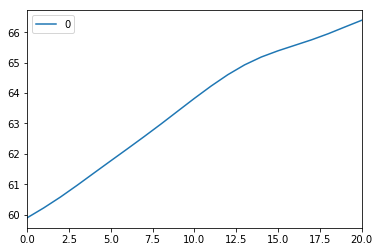

In [85]:
(pd.DataFrame(predictions)).plot()

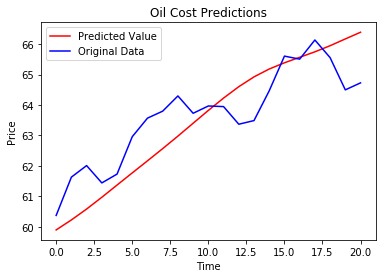

In [21]:

#Visualising the predictions and original data
plt.plot(predictions,color='red',label='Predicted Value')
plt.plot(test_data,color='blue',label='Original Data')
plt.title('Oil Cost Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()